In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib Setup
plt.style.use('ggplot')
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

In [2]:
res = pd.read_csv("results_mlflow/slim1.csv")
res2 = pd.read_csv("results_mlflow/slim2.csv")

res = res.append(res2)

rel_vars = [ 'alpha', 'l1_ratio', 'max_iter', 'tol', 'MAE_eval', 'MAE_train', 'Runtime', 'recallAT4_of_1000', 'recallAT10_of_1000', 'recallAT20_of_1000', 
       'recallAT50_of_1000']

res = res.loc[:, rel_vars]
res = res.sort_values(by='recallAT4_of_1000', ascending=False)

In [128]:
res.head()

,alpha,l1_ratio,max_iter,tol,MAE_eval,MAE_train,Runtime,recallAT4_of_1000,recallAT10_of_1000,recallAT20_of_1000,recallAT50_of_1000
0,4.427181,0.318495,27,0.006841,0.859076,0.841607,6839,0.308141,0.453274,0.563015,0.693277
1,4.509172,6.799451,29,0.022544,0.860227,0.843484,7012,0.308059,0.452960,0.563034,0.693505
2,4.587300,1.094184,23,0.011060,0.859589,0.842770,5750,0.307778,0.452911,0.562749,0.692727
3,5.005779,0.750357,38,0.010123,0.860836,0.845358,9732,0.307718,0.451976,0.561627,0.690617
4,4.618120,0.889555,38,0.044979,0.859704,0.842977,9208,0.307715,0.452724,0.562540,0.692671


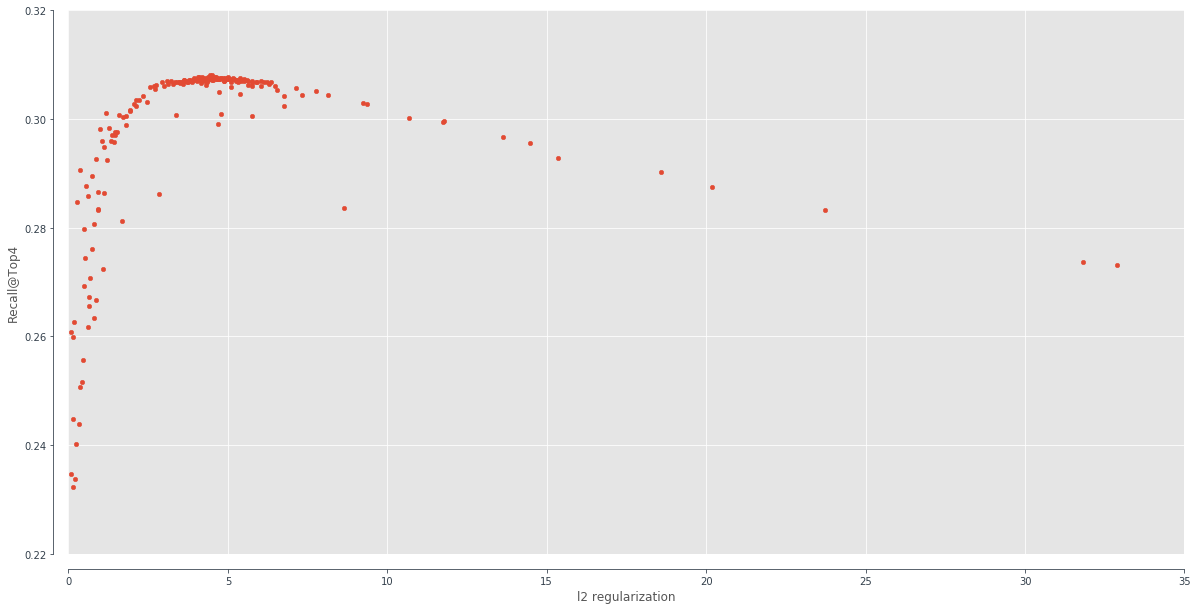

In [127]:
fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x=res.alpha, y=res.recallAT4_of_1000, s=20)
ax.set_xlim(0.0, 35)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['left'].set_smart_bounds(True)
ax.spines['left'].set_position(position=('outward', 15))

ax.spines['bottom'].set_position(position=('outward', 15))
ax.spines['left'].set_bounds(0.22, 0.32)
ax.set_ylim(0.22, 0.32)
ax.set_xlabel('l2 regularization')
ax.set_ylabel('Recall@Top4')

fig.savefig('figures/slim_l2_reg.png')

(0.3, 0.31)

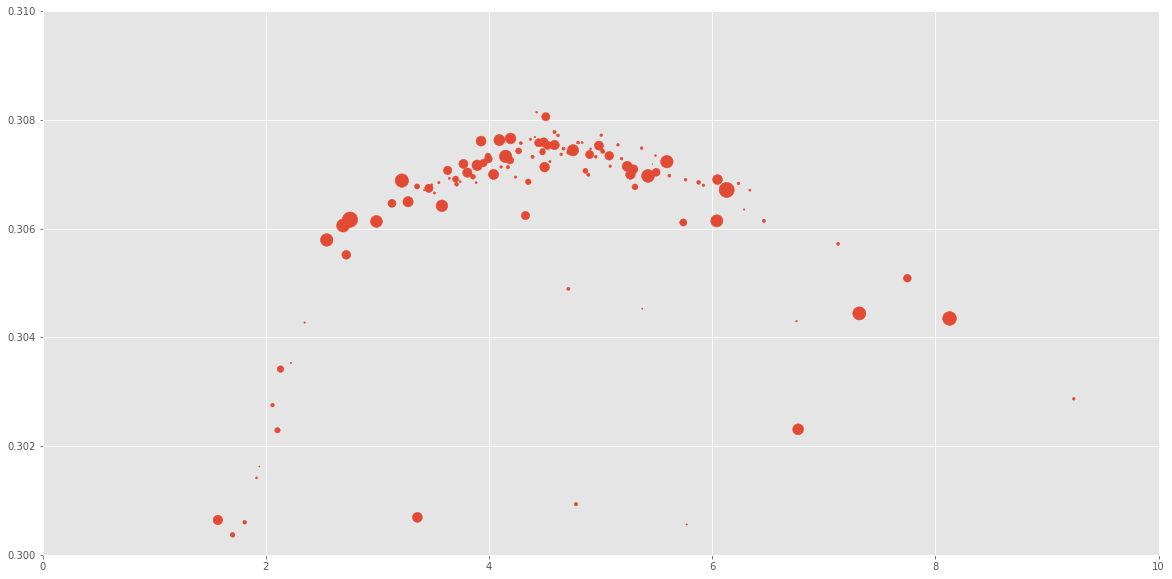

In [4]:
size_fac = 10

rel_data = res.loc[ res.l1_ratio < 25, :]
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=rel_data.alpha, y=rel_data.recallAT4_of_1000, s= size_fac * rel_data.l1_ratio)
ax.set_xlim(0, 10)
ax.set_ylim(0.3, 0.31)

In [144]:
res.columns

Index(['alpha', 'l1_ratio', 'max_iter', 'tol', 'MAE_eval', 'MAE_train',
       'Runtime', 'recallAT4_of_1000', 'recallAT10_of_1000',
       'recallAT20_of_1000', 'recallAT50_of_1000'],
      dtype='object')

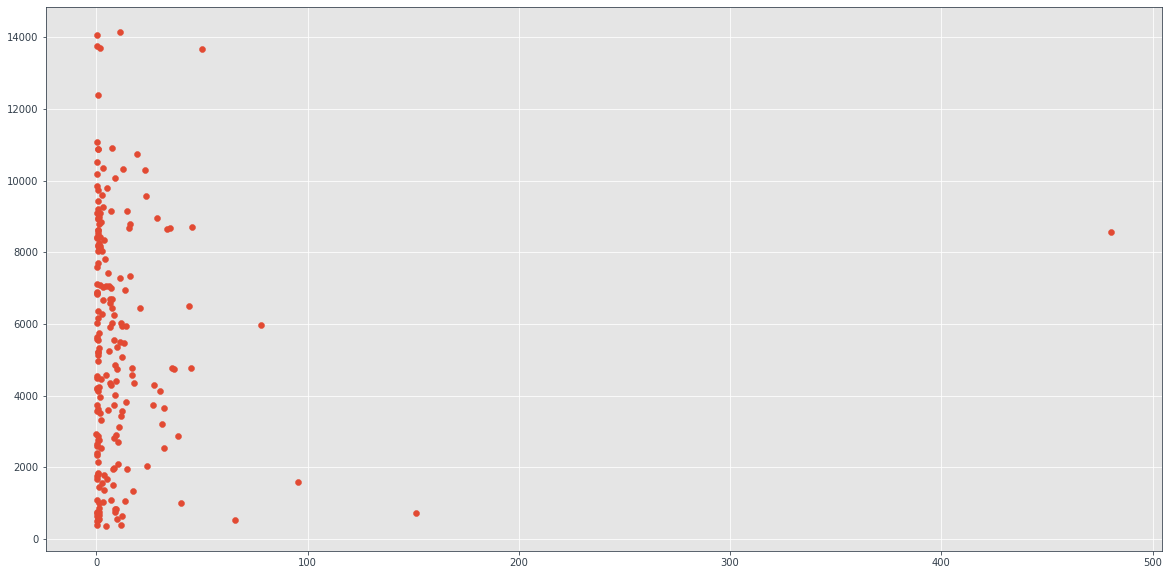

In [145]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=res.l1_ratio, y=res.Runtime)

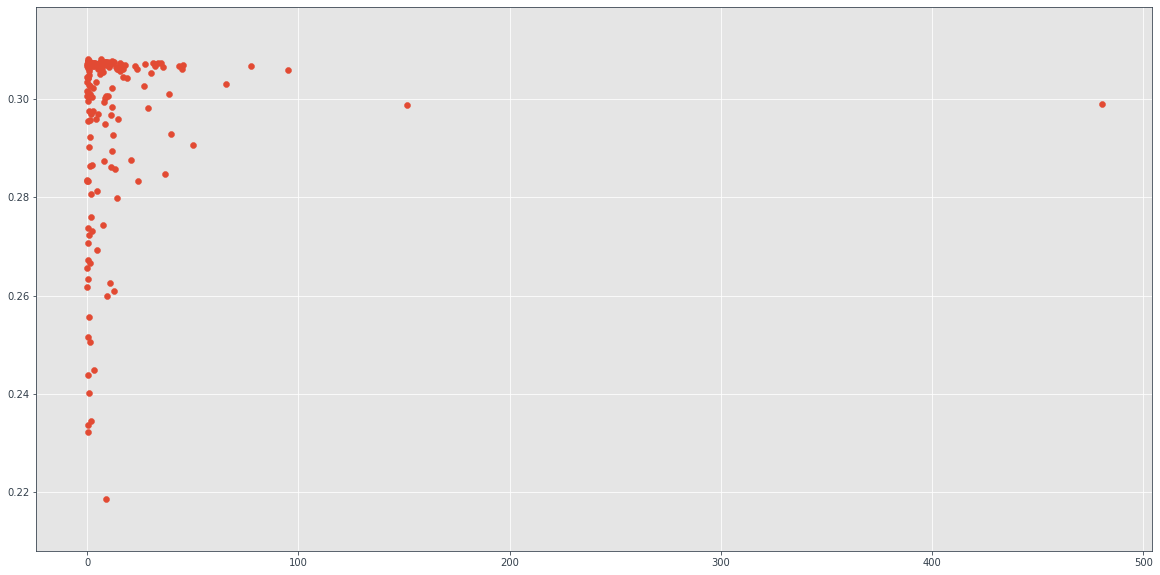

In [143]:
rel_data = res.loc[ res.recallAT4_of_1000 > 0.1, :]

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=rel_data.l1_ratio, y=rel_data.recallAT4_of_1000)

#ax.set_ylim(0.3, 0.3085)

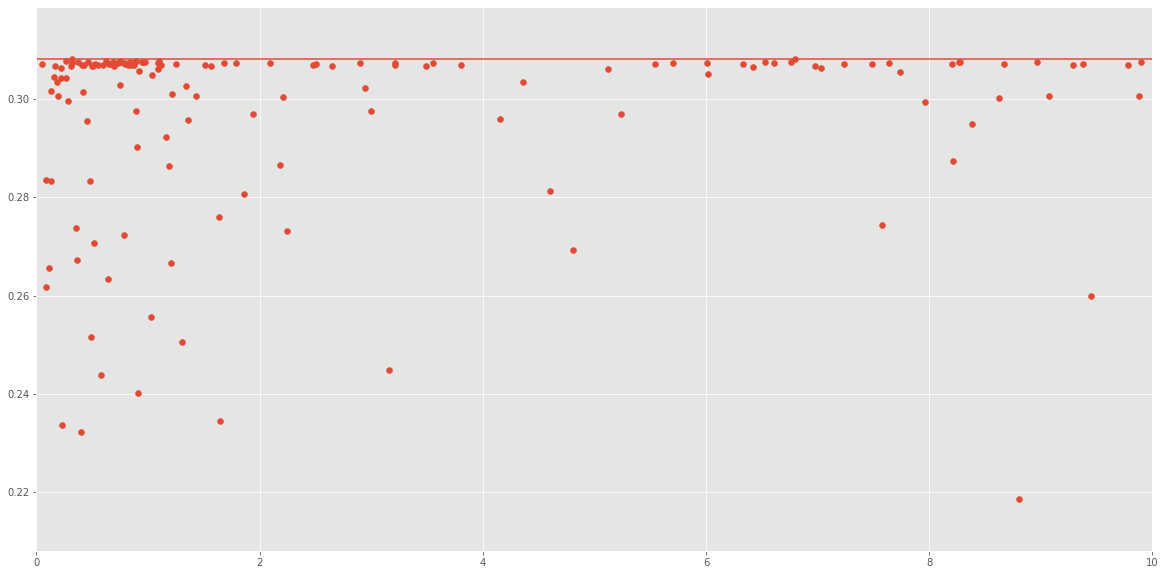

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=res.l1_ratio, y=res.recallAT4_of_1000)
ax.set_xlim(0, 10)

# Make a vertical line at best performing model
best_recall_at_4 = res.recallAT4_of_1000.max()

hline = ax.axhline(y = best_recall_at_4)

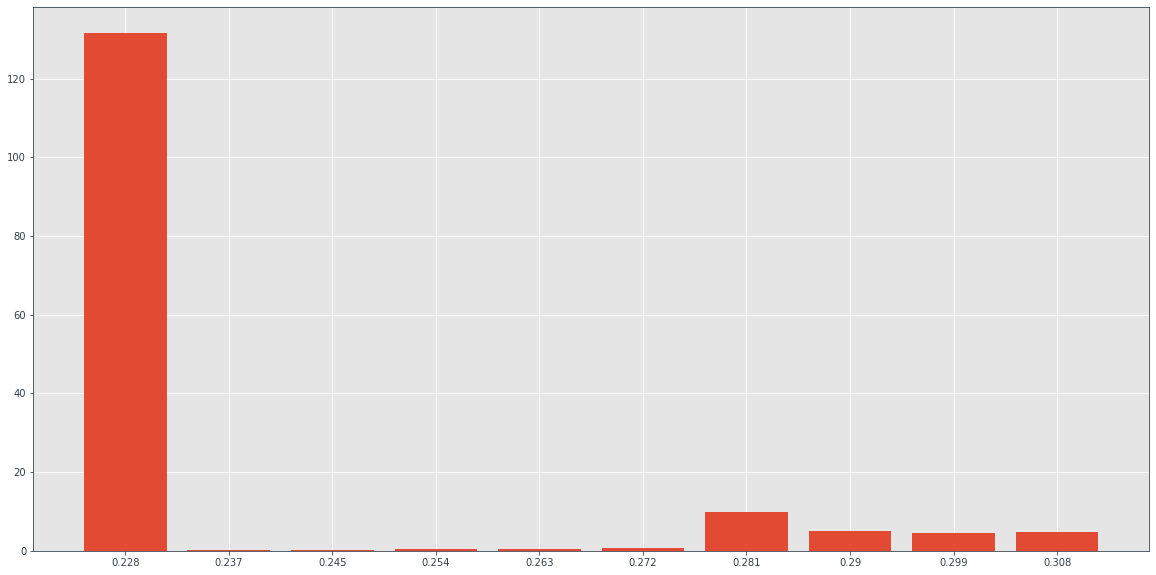

In [45]:
n_bins = 10

min_recall_at_4 = res.recallAT4_of_1000.min()
max_recall_at_4 = res.recallAT4_of_1000.max()
recall_at_4_bins = np.linspace(min_recall_at_4, max_recall_at_4, n_bins + 1)
avrg_l1_ratio = np.zeros(n_bins)

for idx in range(n_bins):
    avrg_l1_ratio[idx] = res.loc[(res.recallAT4_of_1000 >= recall_at_4_bins[idx]) & (res.recallAT4_of_1000 < recall_at_4_bins[idx + 1]), :].alpha.mean()
    
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x = np.arange(n_bins), height = avrg_l1_ratio)
x_ticks = ax.set_xticks(np.arange(n_bins))
x_ticklabel = ax.set_xticklabels([str(round(elem, 3)) for elem in recall_at_4_bins[1:]])

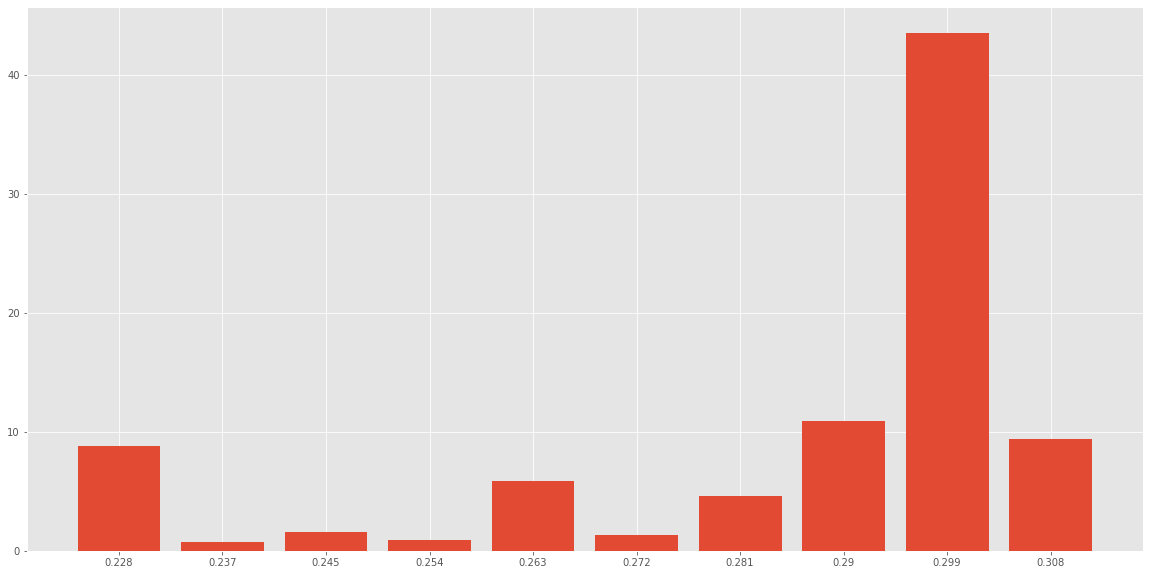

In [9]:
n_bins = 10

min_recall_at_4 = res.recallAT4_of_1000.min()
max_recall_at_4 = res.recallAT4_of_1000.max()
recall_at_4_bins = np.linspace(min_recall_at_4, max_recall_at_4, n_bins + 1)
avrg_l1_ratio = np.zeros(n_bins)

for idx in range(n_bins):
    avrg_l1_ratio[idx] = res.loc[(res.recallAT4_of_1000 >= recall_at_4_bins[idx]) & (res.recallAT4_of_1000 < recall_at_4_bins[idx + 1]), :].l1_ratio.mean()
    
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x = np.arange(n_bins), height = avrg_l1_ratio)
x_ticks = ax.set_xticks(np.arange(n_bins))
x_ticklabel = ax.set_xticklabels([str(round(elem, 3)) for elem in recall_at_4_bins[1:]])

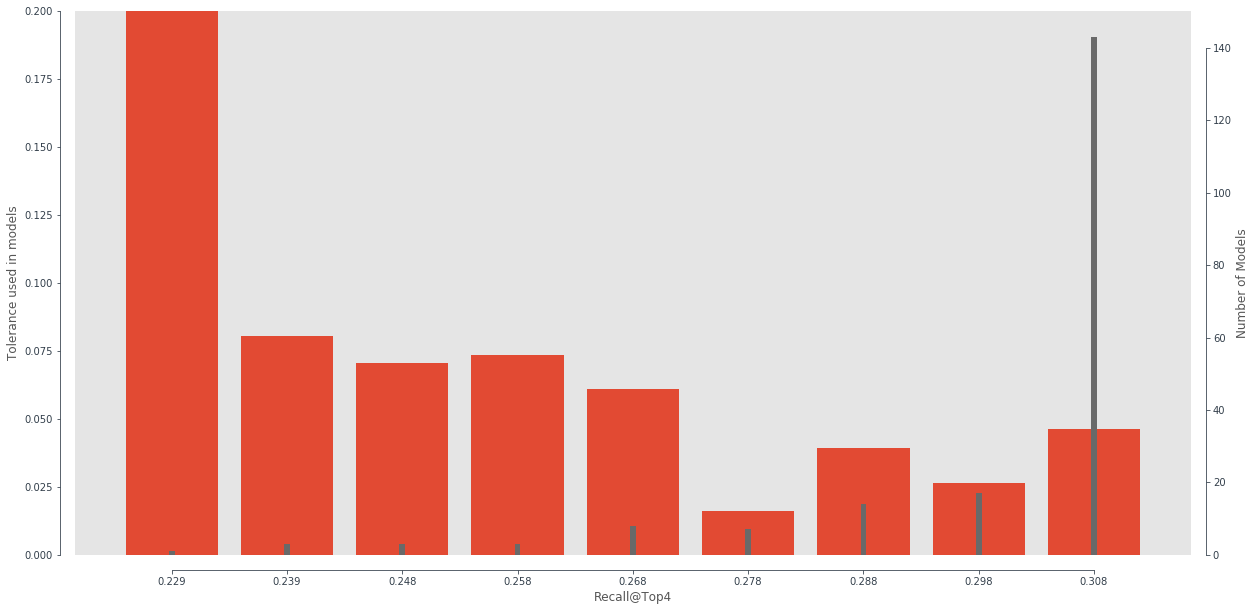

In [125]:

n_bins = 9

min_recall_at_4 = res.recallAT4_of_1000.min()
max_recall_at_4 = res.recallAT4_of_1000.max()
recall_at_4_bins = np.linspace(min_recall_at_4, max_recall_at_4, n_bins + 1)
avrg_l1_ratio = np.zeros(n_bins)

for idx in range(n_bins):
    avrg_l1_ratio[idx] = res.loc[(res.recallAT4_of_1000 >= recall_at_4_bins[idx]) & (res.recallAT4_of_1000 < recall_at_4_bins[idx + 1]), :].tol.mean()
    
count = np.zeros(n_bins)

for idx in range(n_bins):
    count[idx] = ((res.recallAT4_of_1000 >= recall_at_4_bins[idx]) & (res.recallAT4_of_1000 < recall_at_4_bins[idx + 1])).sum()
    
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_smart_bounds(True)
ax1.spines['left'].set_position(position=('outward', 15))
ax1.spines['left'].set_bounds(0.0, 0.20)

ax1.grid(False)
ax1.bar(x = np.arange(n_bins), height = avrg_l1_ratio)
ax1.set_ylim(0.0, 0.20)


# Create second axis.
ax2 = ax1.twinx()
ax2.grid(False)
ax2.bar(x = np.arange(n_bins), height=count, color='dimgray', width=0.05)
x_ticks = ax2.set_xticks(np.arange(n_bins))
x_ticklabel = ax2.set_xticklabels([str(round(elem, 3)) for elem in recall_at_4_bins[1:]])


ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_smart_bounds(True)
ax2.spines['right'].set_position(position=('outward', 15))
ax2.spines['bottom'].set_smart_bounds(True)
ax2.spines['bottom'].set_bounds(0, len(recall_at_4_bins)- 2)
ax2.spines['right'].set_bounds(0, 140)

ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_label_position('bottom')
ax1.spines['bottom'].set_position(position=('outward', 15))

ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(position=('outward', 15))

ax1.set_ylabel('Tolerance used in models')
ax2.set_ylabel('Number of Models')
ax1.set_xlabel('Recall@Top4')

fig.savefig('figures/tol_vs_performance.png')

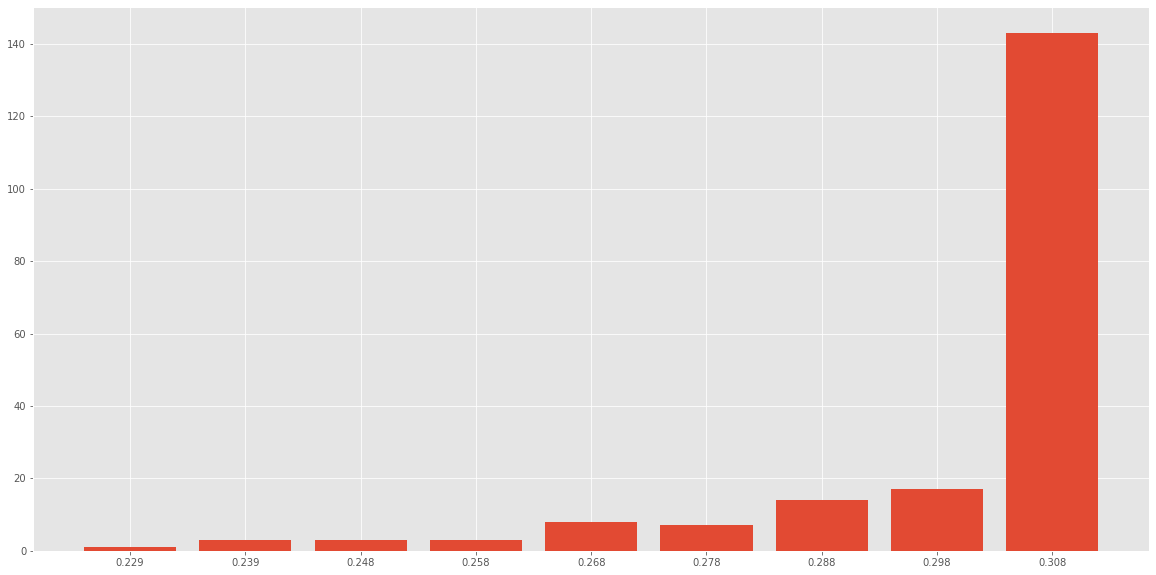

In [23]:
n_bins = 9

min_recall_at_4 = res.recallAT4_of_1000.min()
max_recall_at_4 = res.recallAT4_of_1000.max()
recall_at_4_bins = np.linspace(min_recall_at_4, max_recall_at_4, n_bins + 1)
avrg_l1_ratio = np.zeros(n_bins)
count = np.zeros(n_bins)

for idx in range(n_bins):
    count[idx] = ((res.recallAT4_of_1000 >= recall_at_4_bins[idx]) & (res.recallAT4_of_1000 < recall_at_4_bins[idx + 1])).sum()
    
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x = np.arange(n_bins), height = avrg_l1_ratio)
x_ticks = ax.set_xticks(np.arange(n_bins))
x_ticklabel = ax.set_xticklabels([str(round(elem, 3)) for elem in recall_at_4_bins[1:]])

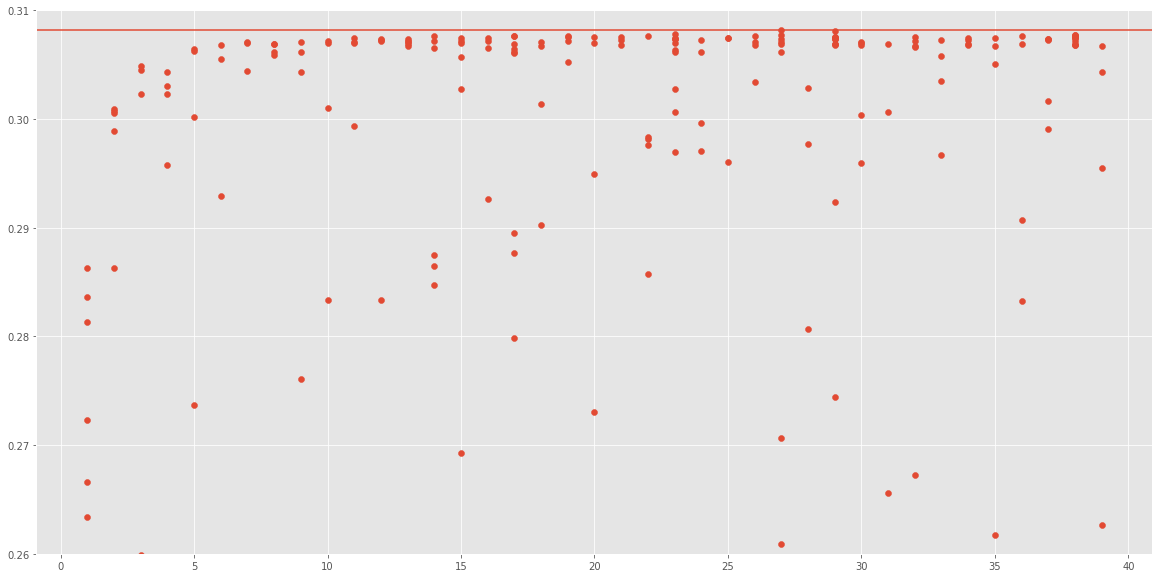

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=res.max_iter, y=res.recallAT4_of_1000)
# Make a vertical line at best performing model
best_recall_at_4 = res.recallAT4_of_1000.max()
ax.set_ylim(0.26, 0.31)

hline = ax.axhline(y = best_recall_at_4)
fig.savefig('figures/max_iter_vs_performance.png')

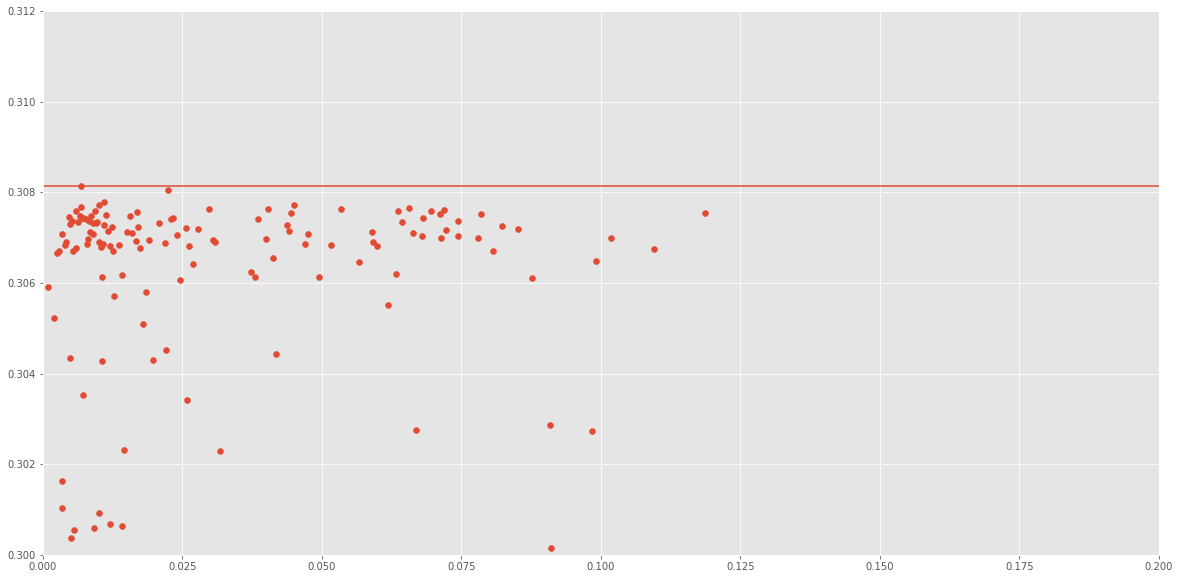

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=res.tol, y=res.recallAT4_of_1000)
# Make a vertical line at best performing model
best_recall_at_4 = res.recallAT4_of_1000.max()

ax.set_xlim(0.0, 0.2)
ax.set_ylim(0.3, 0.312)

hline = ax.axhline(y = best_recall_at_4)


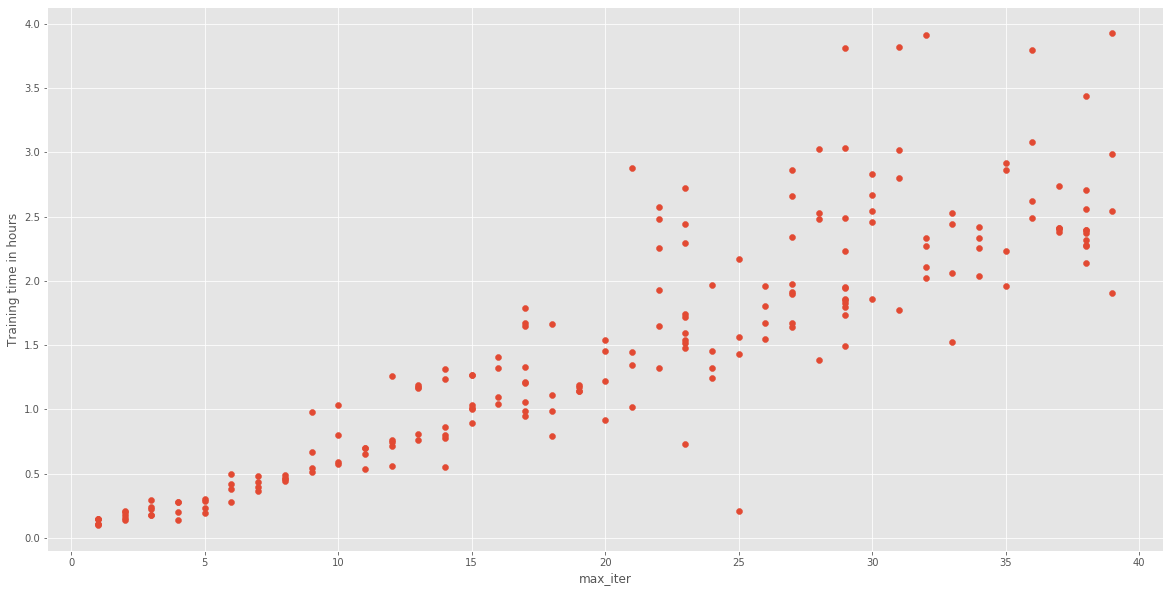

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=res.max_iter, y=res.Runtime / (60 * 60))
ylab = ax.set_ylabel("Training time in hours")
xlab = ax.set_xlabel('max_iter')
fig.savefig('figures/max_iter_vs_training_time.png')

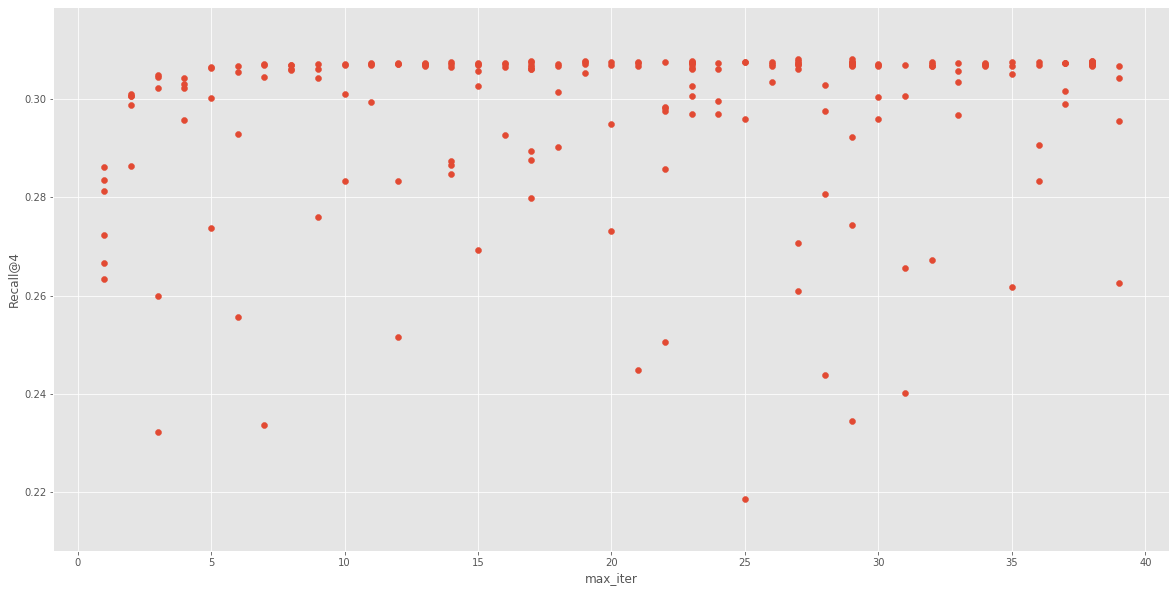

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=res.max_iter, y=res.recallAT4_of_1000)
ylab = ax.set_ylabel("Recall@4")
xlab = ax.set_xlabel('max_iter')
fig.savefig('figures/max_iter_vs_training_time.png')

(0.0, 0.1)

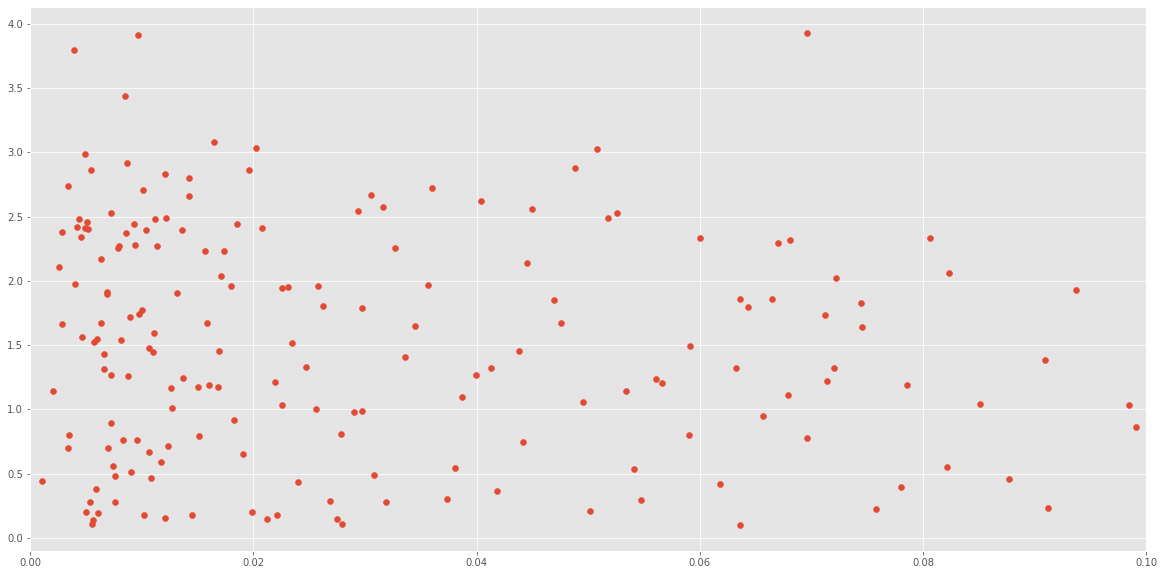

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=res.tol, y=res.Runtime / (60 * 60))
ax.set_xlim(0.0, 0.1)